# Exploración de datos

### **Paso 0: Importación de librerías y Lectura de Datos**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv('credit_customers.csv')

# **Paso 1: Comprensión de datos**

In [3]:
df.shape

(1000, 21)

In [4]:
df.sample(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
654,no checking,24.0,critical/other existing credit,used car,2346.0,<100,4<=X<7,4.0,male single,none,3.0,car,35.0,none,own,2.0,skilled,1.0,yes,yes,good
254,0<=X<200,9.0,existing paid,furniture/equipment,2030.0,no known savings,4<=X<7,2.0,male single,none,1.0,car,24.0,none,own,1.0,skilled,1.0,yes,yes,good
838,<0,24.0,critical/other existing credit,used car,2957.0,<100,>=7,4.0,male single,none,4.0,life insurance,63.0,none,own,2.0,skilled,1.0,yes,yes,good
385,no checking,18.0,critical/other existing credit,radio/tv,2238.0,<100,1<=X<4,2.0,female div/dep/mar,none,1.0,car,25.0,none,own,2.0,skilled,1.0,none,yes,good
318,no checking,12.0,critical/other existing credit,education,701.0,<100,1<=X<4,4.0,male single,none,2.0,car,32.0,none,own,2.0,skilled,1.0,none,yes,good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [6]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


contamos los valores unicos en cada variable:

In [7]:
# loop through each column in the dataframe and count unique values
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"{column}: {unique_values}")

checking_status: 4
duration: 33
credit_history: 5
purpose: 10
credit_amount: 921
savings_status: 5
employment: 5
installment_commitment: 4
personal_status: 4
other_parties: 3
residence_since: 4
property_magnitude: 4
age: 53
other_payment_plans: 3
housing: 3
existing_credits: 4
job: 4
num_dependents: 2
own_telephone: 2
foreign_worker: 2
class: 2


# **Paso 2: Preparación de datos**

In [8]:
#en un principio no vemos columnas que deban ser eliminadas sin explorarlas en profundidad:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [9]:
#chequeamos si existen datos faltantes:
df.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [10]:
#comprobamos que no existan duplicaciones:
df.loc[df.duplicated()]

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class


In [11]:
# Renombramos las columnas:
df = df.rename(columns={'checking_status': 'estado_de_cuenta', 'duration': 'duración',
                        'credit_history': 'historial_crediticio',
                        'purpose': 'propósito', 'credit_amount': 'monto_del_crédito',
                        'savings_status':'estado_de_ahorros', 'employment':'ingresos_laborales',
       'installment_commitment': 'compromiso_de_cuotas', 'personal_status':'estado_civil',
                        'other_parties':'otras_partes_involucradas',
       'residence_since':'años_de_residencia', 'property_magnitude':'patrimonio', 'age':'edad',
                        'other_payment_plans':'otros_planes_de_pago','housing':'vivienda',
                        'existing_credits':'créditos_existentes', 'job':'empleo',
                        'num_dependents': 'núm_de_dependientes', 'own_telephone':'teléfono_propio',
                        'foreign_worker':'trabajador_extranjero', 'class':'clase'})

# **Paso 3: Comprensión de Features**

### Feature target: clase

Empezaremos con nuestra variable target: clase. Esta hace referencia a si el cliente es confiable como sujeto de credito del banco.

In [12]:
df['clase'].value_counts()

good    700
bad     300
Name: clase, dtype: int64

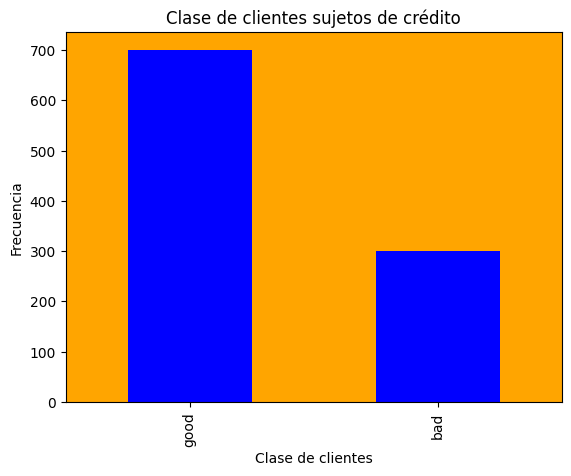

In [13]:
ax = df['clase'].value_counts() \
     .plot(kind='bar', title='Clase de clientes sujetos de crédito', color= 'blue')
ax.set_xlabel('Clase de clientes')
ax.set_ylabel('Frecuencia')
plt.gca().set_facecolor('orange')
plt.show()

### Feature independiente n1: estado_de_cuenta

In [14]:
df['estado_de_cuenta'].value_counts()

no checking    394
<0             274
0<=X<200       269
>=200           63
Name: estado_de_cuenta, dtype: int64

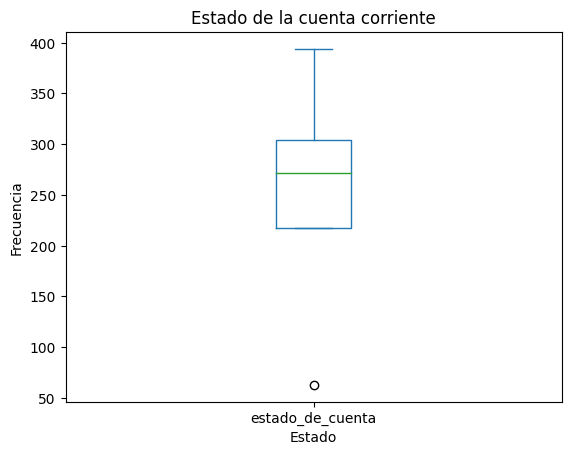

In [15]:
ax = df['estado_de_cuenta'].value_counts() \
     .plot(kind='box', title='Estado de la cuenta corriente')
ax.set_xlabel('Estado')
ax.set_ylabel('Frecuencia')
plt.show()

### Variable independiente n2: 'duracion'

In [16]:
df['duración'].value_counts().head(5)

24.0    184
12.0    179
18.0    113
36.0     83
6.0      75
Name: duración, dtype: int64

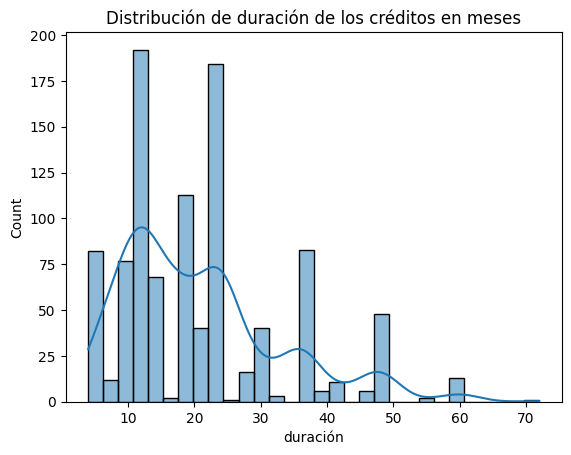

In [17]:
sns.histplot(data = df, x = 'duración', bins = 30, kde = True)
plt.title("Distribución de duración de los créditos en meses")
plt.show()

### Feature n3: historial_crediticio

In [18]:
df['historial_crediticio'].value_counts()

existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: historial_crediticio, dtype: int64

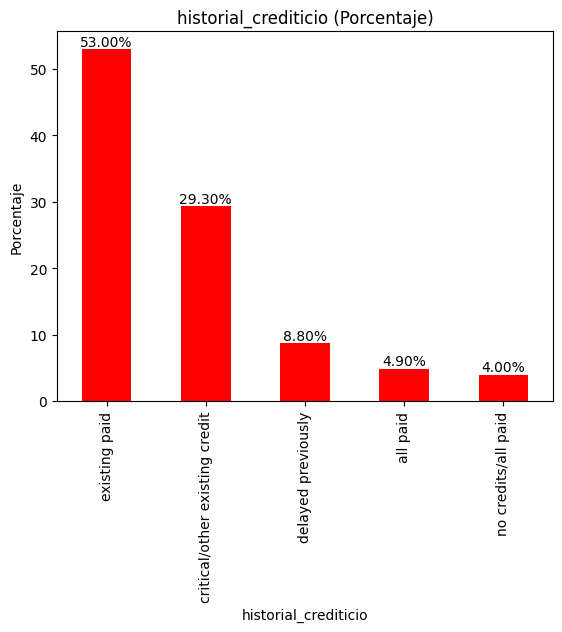

In [19]:
# Paso 1: Calcular los value_counts de la variable
value_counts = df['historial_crediticio'].value_counts()

# Paso 2: Calcular los porcentajes
porcentajes = (value_counts / len(df)) * 100  # Calcula los porcentajes

# Paso 3: Crear el gráfico de barras con los porcentajes
ax = porcentajes.plot(kind='bar', title='historial_crediticio (Porcentaje)', color='red')
ax.set_xlabel('historial_crediticio')
ax.set_ylabel('Porcentaje')

# Mostrar los porcentajes en las etiquetas de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()


### Feature n4: 'propósito'

In [20]:
df['propósito'].value_counts()

radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: propósito, dtype: int64

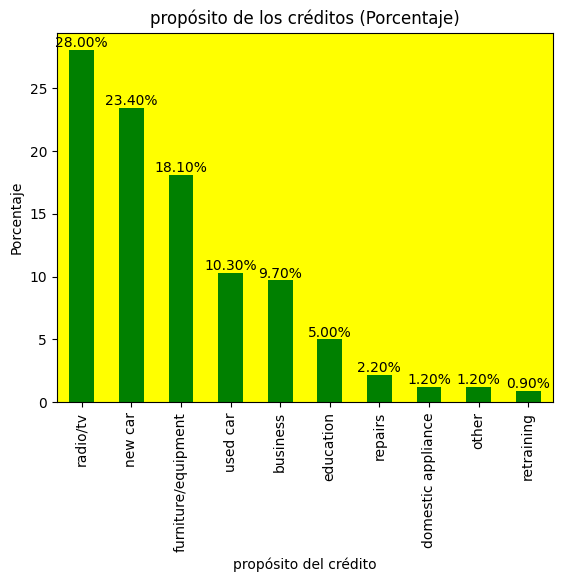

In [21]:
value_counts = df['propósito'].value_counts()

porcentajes = (value_counts / len(df)) * 100

ax = porcentajes.plot(kind='bar', title='propósito de los créditos (Porcentaje)', color='green')
ax.set_xlabel('propósito del crédito')
ax.set_ylabel('Porcentaje')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.gca().set_facecolor('yellow')
plt.show()

### Feature 5: monto_del_crédito

In [22]:
df['monto_del_crédito'].value_counts()

1478.0    3
1262.0    3
1258.0    3
1275.0    3
1393.0    3
         ..
1459.0    1
882.0     1
3758.0    1
1136.0    1
4576.0    1
Name: monto_del_crédito, Length: 921, dtype: int64

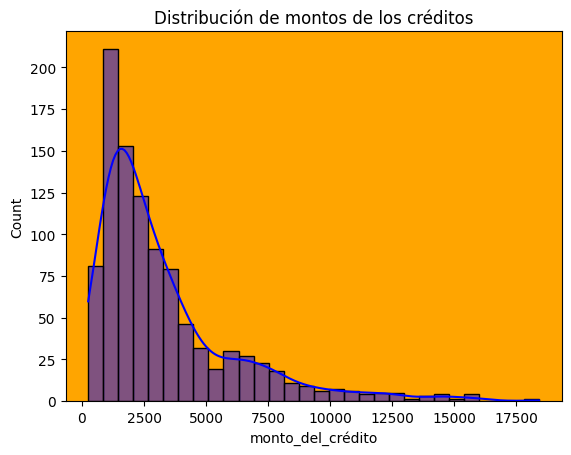

In [23]:
sns.histplot(data = df, x = 'monto_del_crédito', bins = 30, kde = True, color='blue')
plt.title("Distribución de montos de los créditos")
plt.gca().set_facecolor('orange')
plt.show()

### Feature 6: estado_de_ahorros

In [24]:
df['estado_de_ahorros'].value_counts()

<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: estado_de_ahorros, dtype: int64

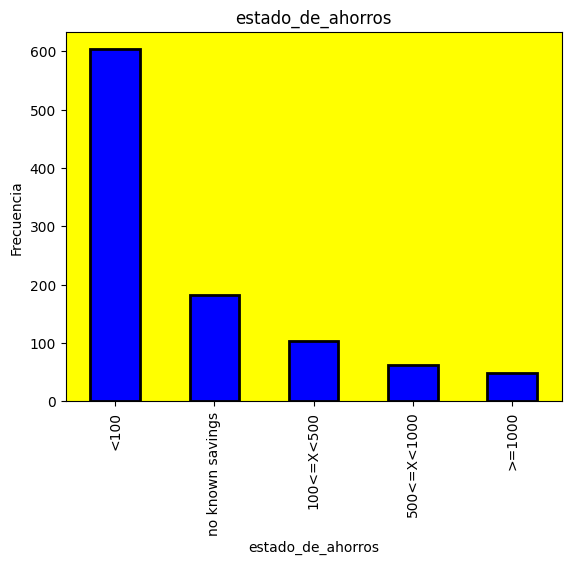

In [25]:
ax = df['estado_de_ahorros'].value_counts() \
     .plot(kind='bar', title='estado_de_ahorros', color= 'blue', linewidth=2, edgecolor='black')
ax.set_xlabel('estado_de_ahorros')
ax.set_ylabel('Frecuencia')
plt.gca().set_facecolor('yellow')

plt.show()

### Feature n7: Ingresos laborales

In [26]:
df['ingresos_laborales'].value_counts()

1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: ingresos_laborales, dtype: int64

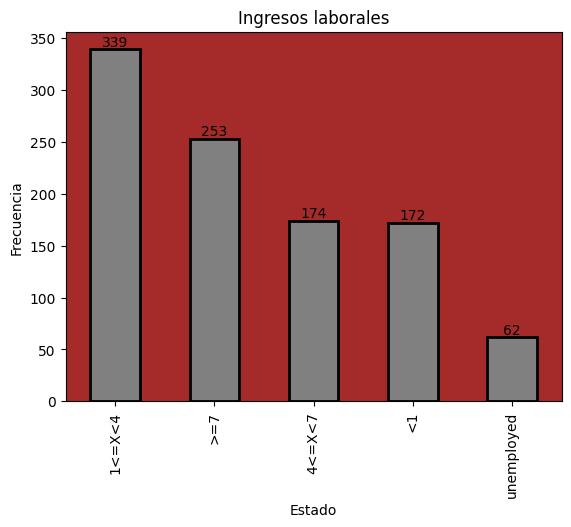

In [27]:
ax = df['ingresos_laborales'].value_counts() \
     .plot(kind='bar', title='Ingresos laborales', color='grey', linewidth=2, edgecolor='black')
ax.set_xlabel('Estado')
ax.set_ylabel('Frecuencia')
plt.gca().set_facecolor('brown')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')


plt.show()

### Feature 8: compromiso_de_cuotas

In [28]:
df['compromiso_de_cuotas'].value_counts()

4.0    476
2.0    231
3.0    157
1.0    136
Name: compromiso_de_cuotas, dtype: int64

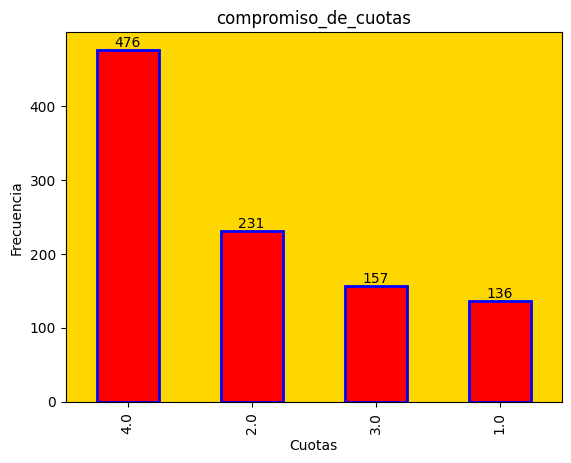

In [29]:
ax = df['compromiso_de_cuotas'].value_counts() \
     .plot(kind='bar', title='compromiso_de_cuotas', color='red', linewidth=2, edgecolor='blue')
ax.set_xlabel('Cuotas')
ax.set_ylabel('Frecuencia')
plt.gca().set_facecolor('gold')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

### Feature 9: estado_civil

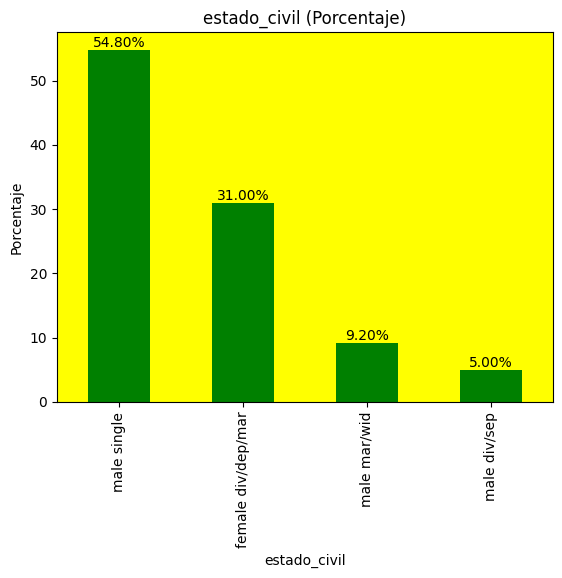

In [30]:
value_counts = df['estado_civil'].value_counts()

porcentajes = (value_counts / len(df)) * 100

ax = porcentajes.plot(kind='bar', title='estado_civil (Porcentaje)', color='green')
ax.set_xlabel('estado_civil')
ax.set_ylabel('Porcentaje')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.gca().set_facecolor('yellow')
plt.show()

### Feature 10: otras_partes_involucradas

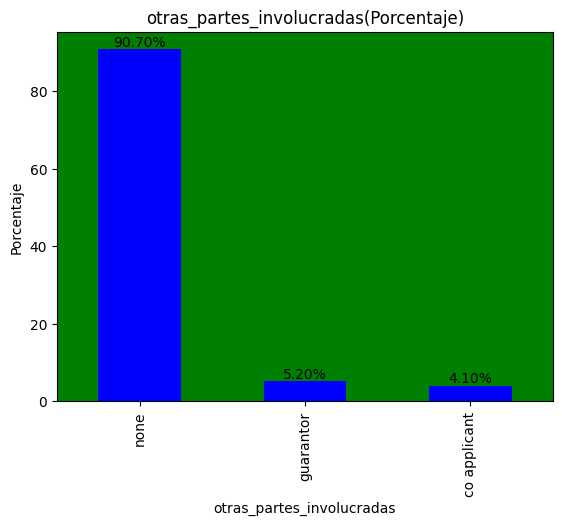

In [31]:
value_counts = df['otras_partes_involucradas'].value_counts()

porcentajes = (value_counts / len(df)) * 100

ax = porcentajes.plot(kind='bar', title='otras_partes_involucradas(Porcentaje)', color='blue')
ax.set_xlabel('otras_partes_involucradas')
ax.set_ylabel('Porcentaje')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.gca().set_facecolor('green')
plt.show()

### Feature 11: años_de_residencia

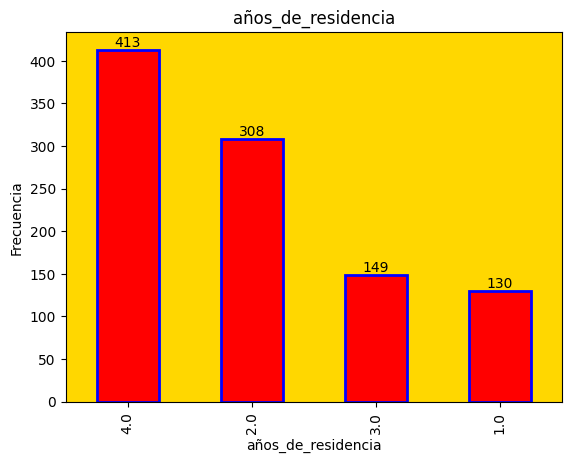

In [32]:
ax = df['años_de_residencia'].value_counts() \
     .plot(kind='bar', title='años_de_residencia', color='red', linewidth=2, edgecolor='blue')
ax.set_xlabel('años_de_residencia')
ax.set_ylabel('Frecuencia')
plt.gca().set_facecolor('gold')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

### feature 12: patrimonio

In [33]:
df['patrimonio'].value_counts()

car                  332
real estate          282
life insurance       232
no known property    154
Name: patrimonio, dtype: int64

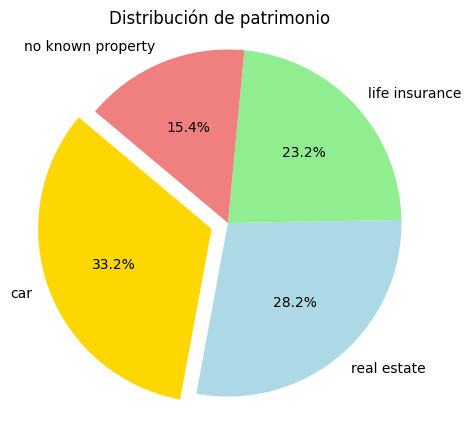

In [34]:

patrimonio_counts = [332, 282, 232, 154]
categorias = ['car', 'real estate', 'life insurance', 'no known property']

# Colores para las categorías
colores = ['gold', 'lightblue', 'lightgreen', 'lightcoral']

# Explosta la primera categoría (car)
explode = (0.1, 0, 0, 0)  # Esto separará la primera categoría (car) del resto del gráfico

# Crea el gráfico de torta
plt.figure(figsize=(5, 5))  # Ajusta el tamaño del gráfico si es necesario
plt.pie(patrimonio_counts, labels=categorias, colors=colores, autopct='%1.1f%%', startangle=140, explode=explode)

# Añade un título
plt.title("Distribución de patrimonio")

# Muestra el gráfico
plt.axis('equal')  # Esto asegura que el gráfico de torta se vea como un círculo
plt.show()


### Feature 13 Edad

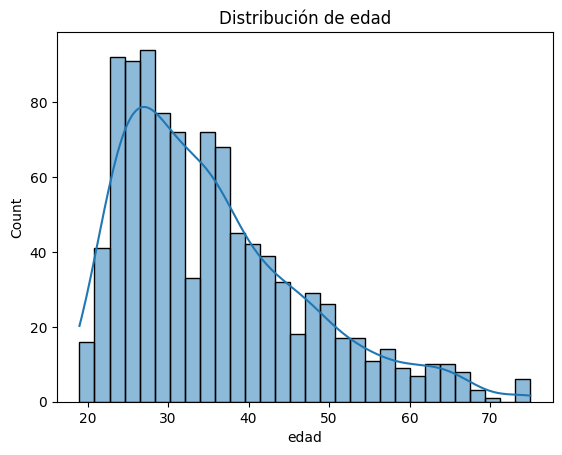

In [35]:
sns.histplot(data = df, x = 'edad', bins = 30, kde = True)
plt.title("Distribución de edad")
plt.show()

### feature 14:otros_planes_de_pago

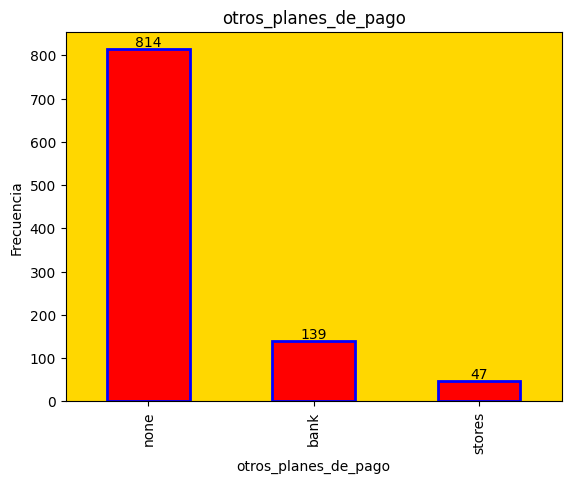

In [36]:
ax = df['otros_planes_de_pago'].value_counts() \
     .plot(kind='bar', title='otros_planes_de_pago', color='red', linewidth=2, edgecolor='blue')
ax.set_xlabel('otros_planes_de_pago')
ax.set_ylabel('Frecuencia')
plt.gca().set_facecolor('gold')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

### feature 15: vivienda

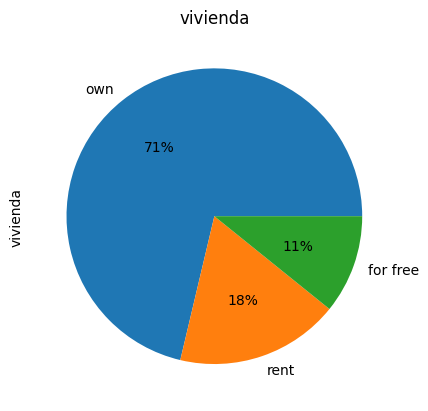

In [37]:
value_counts = df['vivienda'].value_counts()

porcentajes = (value_counts / len(df)) * 100

ax = porcentajes.plot(kind='pie', title='vivienda',autopct='%.0f%%')

plt.show()

### feature 16: créditos_existentes

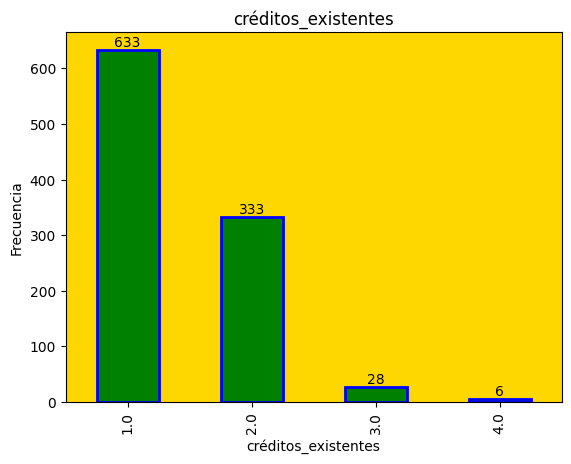

In [38]:
ax = df['créditos_existentes'].value_counts() \
     .plot(kind='bar', title='créditos_existentes', color='green', linewidth=2, edgecolor='blue')
ax.set_xlabel('créditos_existentes')
ax.set_ylabel('Frecuencia')
plt.gca().set_facecolor('gold')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

### feature 17: empleo

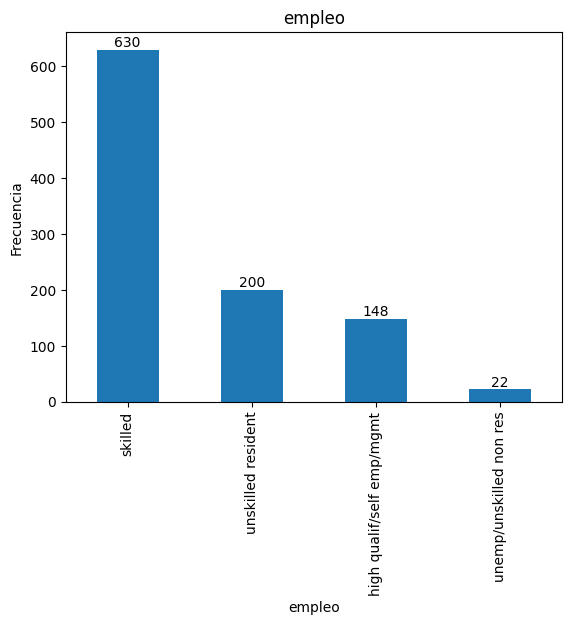

In [39]:
ax = df['empleo'].value_counts() \
     .plot(kind='bar', title='empleo')
ax.set_xlabel('empleo')
ax.set_ylabel('Frecuencia')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

### Feature 18: núm_de_dependientes

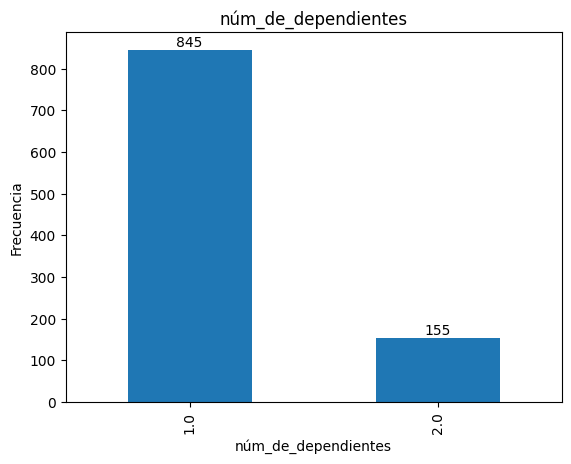

In [40]:
ax = df['núm_de_dependientes'].value_counts() \
     .plot(kind='bar', title='núm_de_dependientes')
ax.set_xlabel('núm_de_dependientes')
ax.set_ylabel('Frecuencia')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

### feature 19: teléfono_propio

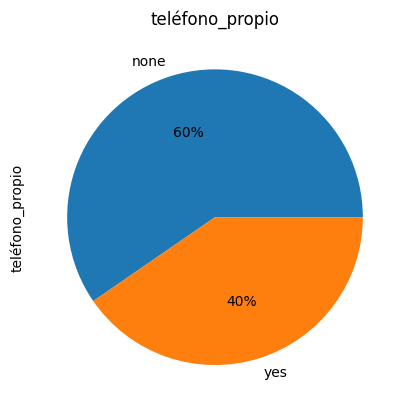

In [41]:
value_counts = df['teléfono_propio'].value_counts()

porcentajes = (value_counts / len(df)) * 100

ax = porcentajes.plot(kind='pie', title='teléfono_propio',autopct='%.0f%%')

plt.show()

### feature 20: trabajador_extranjero

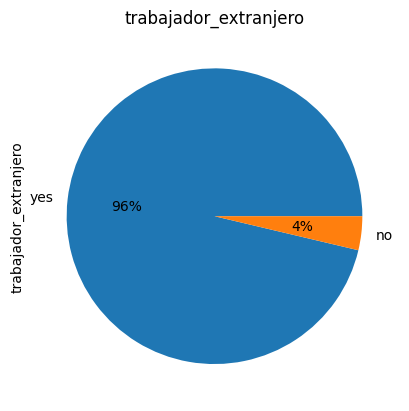

In [42]:
value_counts = df['trabajador_extranjero'].value_counts()

porcentajes = (value_counts / len(df)) * 100

ax = porcentajes.plot(kind='pie', title='trabajador_extranjero',autopct='%.0f%%')

plt.show()

# Paso 4: Relación entre variables

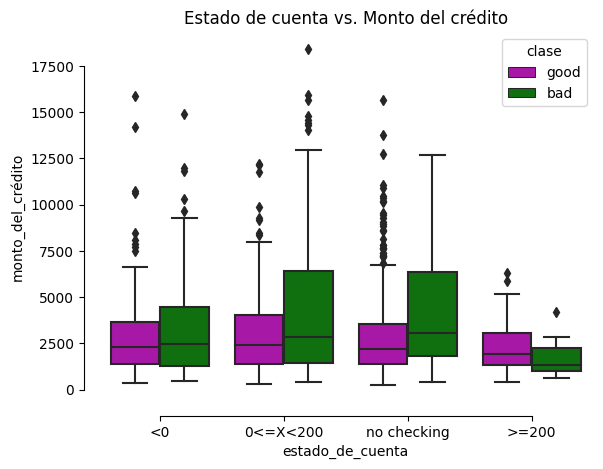

In [43]:
sns.boxplot(x="estado_de_cuenta", y="monto_del_crédito",
            hue="clase", palette=["m", "g"],
            data=df)
plt.title("Estado de cuenta vs. Monto del crédito")
sns.despine(offset=10, trim=True)

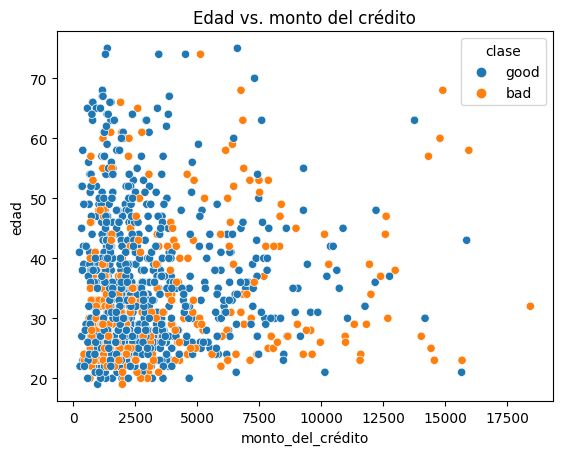

In [44]:
ax = sns.scatterplot(x='monto_del_crédito',
                y='edad',
                hue='clase',
                data=df)
ax.set_title('Edad vs. monto del crédito')
plt.show()

Graficos de barras divididos por clase:

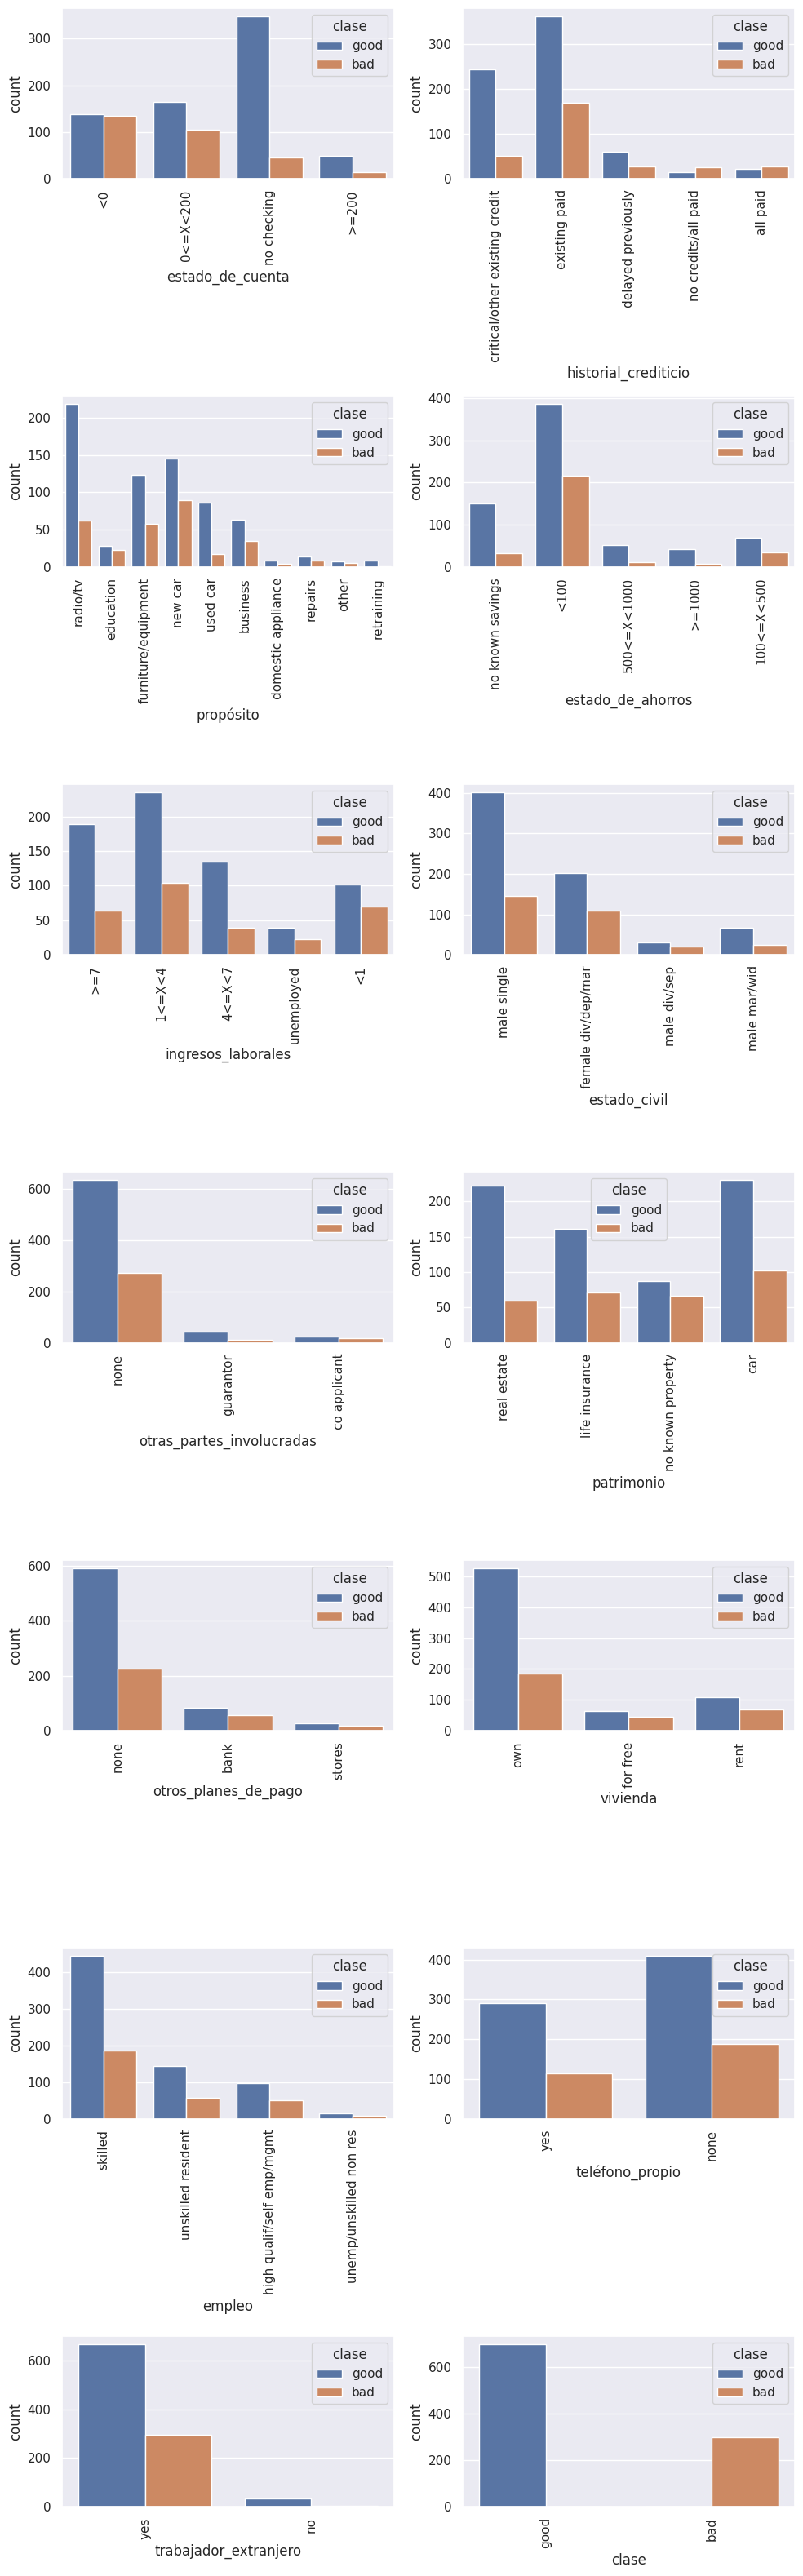

In [45]:
sns.set_theme()
plt.figure(figsize = (10, 50))

category_list = df.select_dtypes(include='object').columns


x=0
for i in category_list:
    x+=1
    plt.subplot(11, 2, x)
    plt.xticks(rotation=90)
    #plt.gca().set_title(i)
    sns.countplot(x = i, hue = 'clase',  data = df)
    if x==1 or x==2:
        plt.tight_layout()

In [46]:
#sacamos las correlaciones, procurando eliminar los datos nulos
df_corr = df.corr()
df_corr

<ipython-input-46-65c41e303d78>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


,duración,monto_del_crédito,compromiso_de_cuotas,años_de_residencia,edad,créditos_existentes,núm_de_dependientes
duración,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
monto_del_crédito,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
compromiso_de_cuotas,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
años_de_residencia,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
edad,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
créditos_existentes,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
núm_de_dependientes,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


<Axes: >

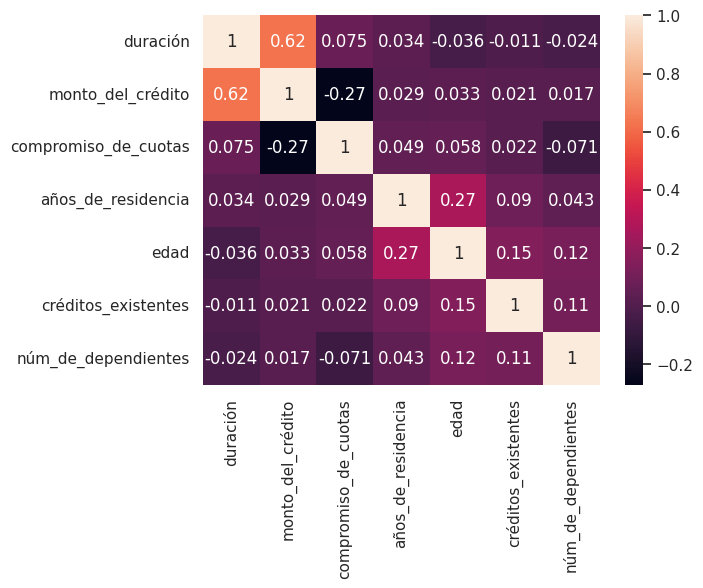

In [47]:
sns.heatmap(df_corr, annot=True)

Chequeamos la relacion de monto del credito y compromiso de cuotas:

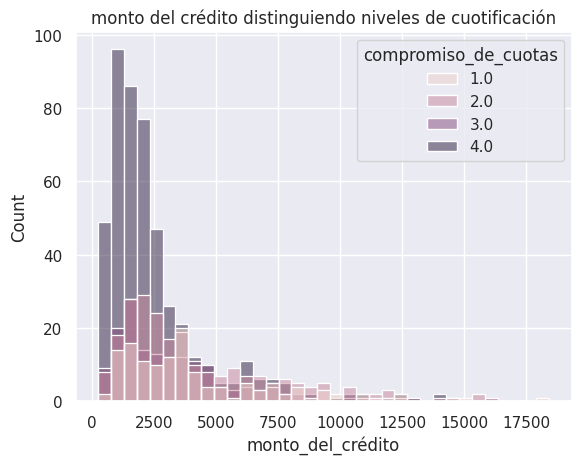

In [48]:
ax = sns.histplot(x='monto_del_crédito',
                hue='compromiso_de_cuotas',
                data=df)
ax.set_title('monto del crédito distinguiendo niveles de cuotificación')
plt.show()

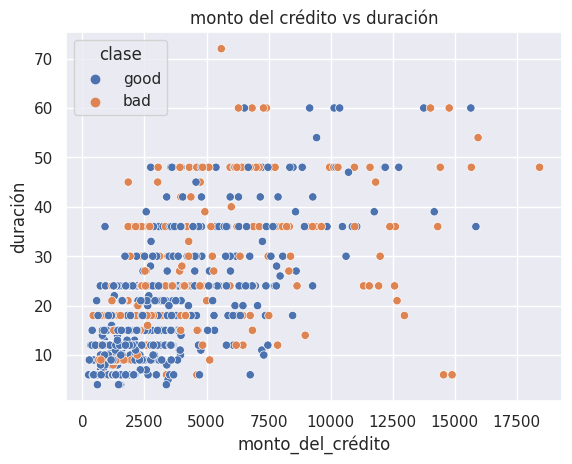

In [49]:
ax = sns.scatterplot(x='monto_del_crédito',
                y='duración', hue='clase',
                data=df)
ax.set_title('monto del crédito vs duración')
plt.show()

# Preprocesamiento

In [50]:
df.columns

Index(['estado_de_cuenta', 'duración', 'historial_crediticio', 'propósito',
       'monto_del_crédito', 'estado_de_ahorros', 'ingresos_laborales',
       'compromiso_de_cuotas', 'estado_civil', 'otras_partes_involucradas',
       'años_de_residencia', 'patrimonio', 'edad', 'otros_planes_de_pago',
       'vivienda', 'créditos_existentes', 'empleo', 'núm_de_dependientes',
       'teléfono_propio', 'trabajador_extranjero', 'clase'],
      dtype='object')

In [51]:
# drop low importnace columns

del df['estado_civil']
del df['otras_partes_involucradas']
del df['vivienda']
del df['patrimonio']
del df['años_de_residencia']
del df['teléfono_propio']
del df['núm_de_dependientes']
del df['trabajador_extranjero']

## Normalización y codificación

convertimos los datos object a categorical

In [52]:
def object_to_categorical(df):
    object_cols = df.select_dtypes(include='object').columns
    for col in object_cols:
        df[col] = df[col].astype('category')
    return df

df = object_to_categorical(df)

Escalamiento de datos:

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
df.dtypes

estado_de_cuenta        category
duración                 float64
historial_crediticio    category
propósito               category
monto_del_crédito        float64
estado_de_ahorros       category
ingresos_laborales      category
compromiso_de_cuotas     float64
edad                     float64
otros_planes_de_pago    category
créditos_existentes      float64
empleo                  category
clase                   category
dtype: object

In [55]:
col = ['duración','monto_del_crédito','edad']

In [56]:
#Aplicamos la estandarizacion a las variables de interes
scaler = MinMaxScaler()

df[col] = scaler.fit_transform(df[col])

Codificación:

In [57]:
df['otros_planes_de_pago'].value_counts()

none      814
bank      139
stores     47
Name: otros_planes_de_pago, dtype: int64

In [58]:
df['estado_de_cuenta'] = df['estado_de_cuenta'].replace('no checking','<0')
df['estado_de_ahorros'] = df['estado_de_ahorros'].replace('no known savings', '<100')

codificacion ordinal:

In [59]:
df['estado_de_cuenta'] = df['estado_de_cuenta'].map({"<0": 0, "0<=X<200": 1, ">=200": 2})
df['historial_crediticio'] = df['historial_crediticio'].map({"existing paid": 2, "critical/other existing credit": 0, "delayed previously": 1, 'all paid':2, 'no credits/all paid':2})
df['estado_de_ahorros'] = df['estado_de_ahorros'].map({"<100": 0, "100<=X<500": 1, "500<=X<1000": 2, ">=1000":3})
df['ingresos_laborales'] = df['ingresos_laborales'].map({"unemployed": 0, "<1": 1, "4<=X<7": 2, ">=7":3, "1<=X<4":4})

In [60]:
df['estado_de_ahorros'].value_counts()

0    786
1    103
2     63
3     48
Name: estado_de_ahorros, dtype: int64

codificacion con label encoder

In [61]:
from sklearn.preprocessing import LabelEncoder
# one-hot encode the categorical columns

cat_cols = ['propósito','otros_planes_de_pago','empleo']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

codificamos a mano la variable target:

In [62]:
df['clase'] = df['clase'].map({"good": 0, "bad": 1})

# Outliers

Local outlier factor

In [63]:
from sklearn.neighbors import LocalOutlierFactor

lof_outlier = LocalOutlierFactor(n_neighbors=20)
outlier_scores = lof_outlier.fit_predict(df)

In [64]:
#Cantidad de outliers detectados
sum(outlier_scores == -1)

3

# Modelos

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [66]:
X = df.drop('clase', axis=1)
y = df['clase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Regresión logística

In [67]:
#entrenamos el modelo y predecimos
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred_y = log_reg.predict(X_test)


In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

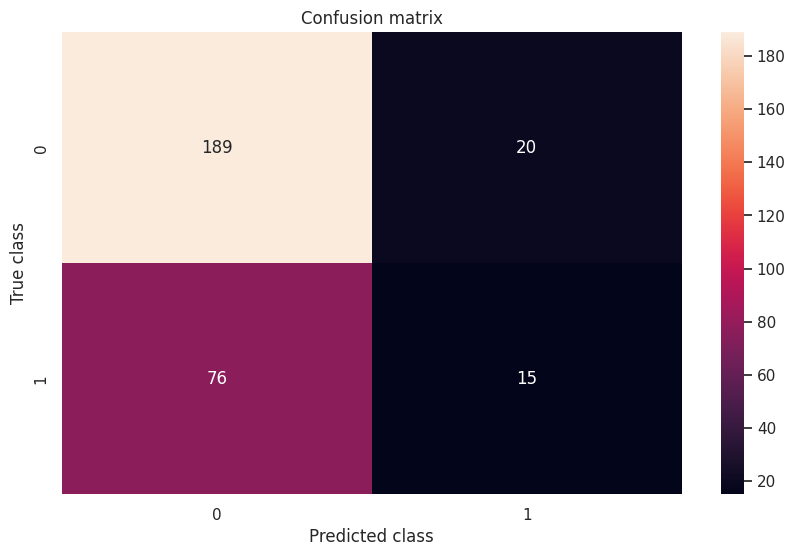

              precision    recall  f1-score   support

           0       0.71      0.90      0.80       209
           1       0.43      0.16      0.24        91

    accuracy                           0.68       300
   macro avg       0.57      0.53      0.52       300
weighted avg       0.63      0.68      0.63       300



In [69]:
# medimos los resultados en una matriz de confusión
def mostrar_resultados(y_test, pred_y):
  conf_matrix = confusion_matrix(y_test, pred_y)
  plt.figure(figsize=(10, 6))
  sns.heatmap(conf_matrix, annot=True, fmt="d");
  plt.title("Confusion matrix")
  plt.ylabel('True class')
  plt.xlabel('Predicted class')
  plt.show()
  print (classification_report(y_test, pred_y))

mostrar_resultados(y_test, pred_y)

## KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

elegimos primero el mejor valor de K:

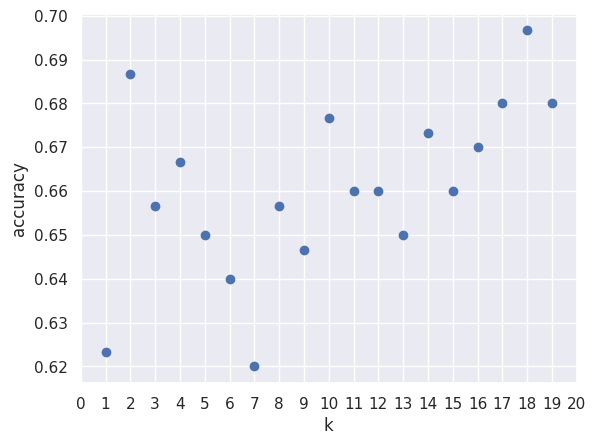

In [71]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.show()

el mejor K es el 8

In [72]:
n_neighbors = 18

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

pred_y = knn.predict(X_test)

Accuracy of K-NN classifier on training set: 0.74
Accuracy of K-NN classifier on test set: 0.70


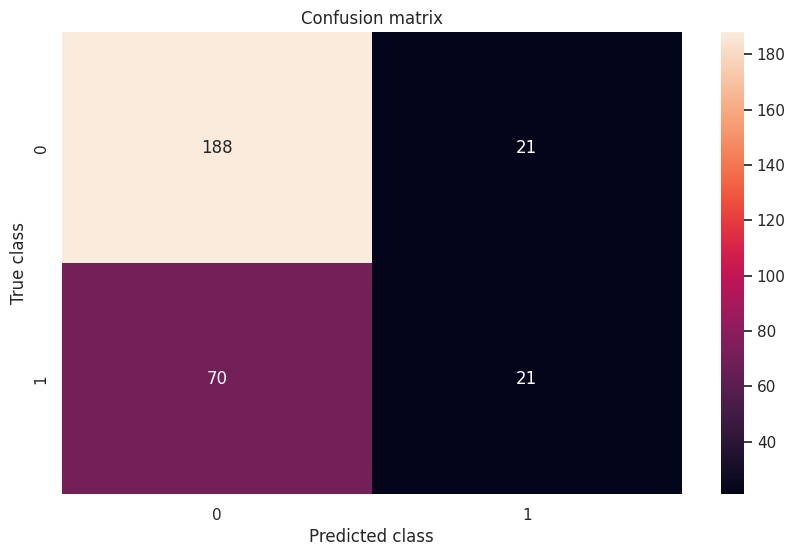

              precision    recall  f1-score   support

           0       0.73      0.90      0.81       209
           1       0.50      0.23      0.32        91

    accuracy                           0.70       300
   macro avg       0.61      0.57      0.56       300
weighted avg       0.66      0.70      0.66       300



In [73]:
mostrar_resultados(y_test, pred_y)

## Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

Feature Selection

Para mejorar nuestros resultados con este algoritmo, en vez de utilizar todas las columnas de datos de entrada que tenemos, vamos a utilizar una Clase de SkLearn llamada SelectKBest con la que seleccionaremos las 5 mejores características y usaremos sólo esas.

In [75]:
best=SelectKBest(k=5)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['duración', 'historial_crediticio', 'propósito', 'monto_del_crédito',
       'estado_de_ahorros'],
      dtype='object')


Veamos qué grado de correlación tienen las 5 features elegidas:

<Axes: title={'center': 'Pearson Correlation of Features'}>

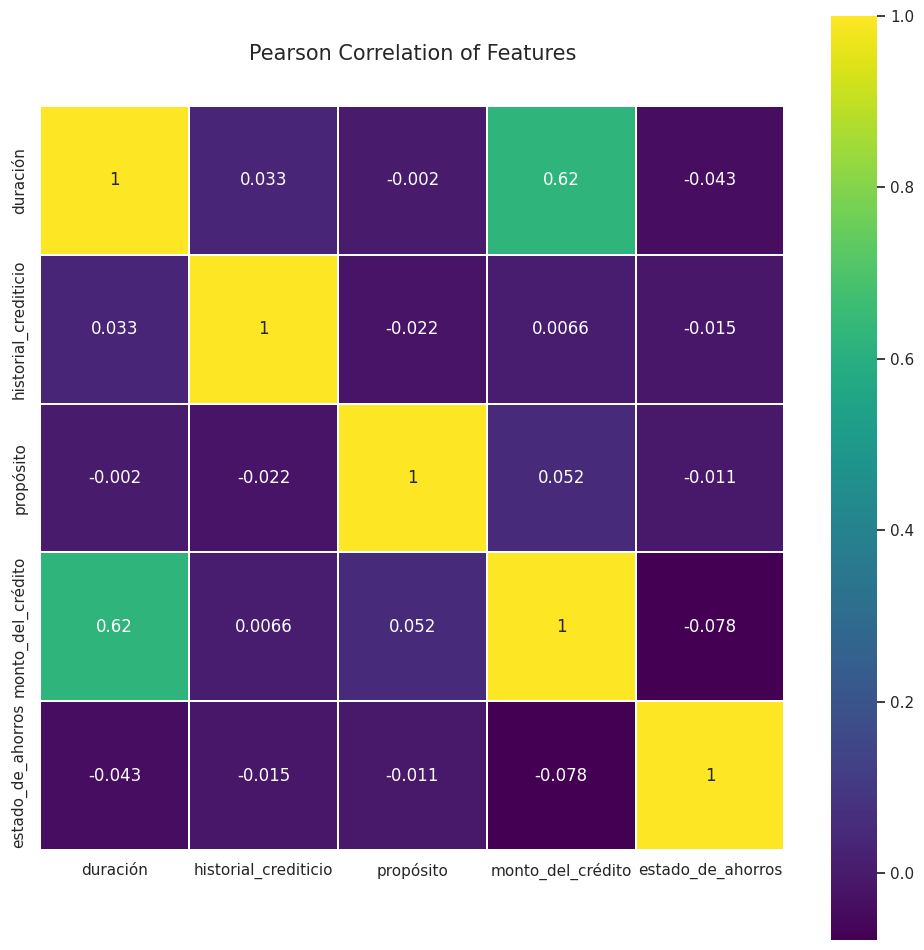

In [76]:
used_features =X.columns[selected]

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


creamos el modelo:

In [77]:
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train[used_features].values,
    y_train)

pred_y = gnb.predict(X_test[used_features])

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Precisión en el set de Entrenamiento: 0.71
Precisión en el set de Test: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


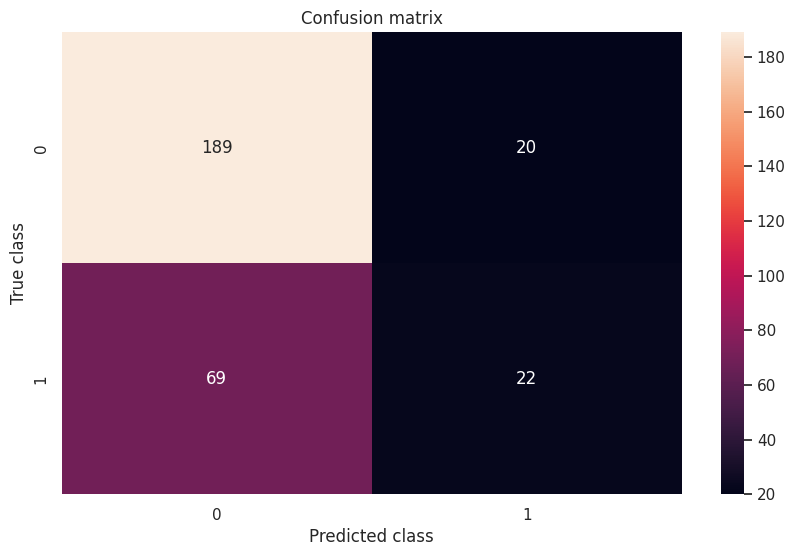

              precision    recall  f1-score   support

           0       0.73      0.90      0.81       209
           1       0.52      0.24      0.33        91

    accuracy                           0.70       300
   macro avg       0.63      0.57      0.57       300
weighted avg       0.67      0.70      0.66       300



In [78]:
mostrar_resultados(y_test, pred_y)

## Arbol de clasificación:

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

primero buscamos los mejores hiperparámetros:

### n1- maximo de profundidad

In [80]:
lista = []

for i in range(1, 8):
    # Creamos el modelo para un dado valor de i
    arbol = DecisionTreeClassifier(criterion='entropy', max_depth= i, random_state=42)

    # Calculamos los scores al hacer cross-validation con 5 folds
    scores = cross_val_score(arbol, X_train, y_train, cv=5)

    # Calculamos la media de los scores y la añadimos a la lista
    lista.append(scores.mean())

    # Imprimimos el valor de max. hojas (i) y el score medio
    print(f'max. profundidad {i} - Score medio = {scores.mean()}')

# Encuentra el valor máximo en la lista y su índice
maximo_valor = max(lista)
indice_maximo = lista.index(maximo_valor)

mejor_prof = indice_maximo + 1

# Imprime el número de hojas correspondiente al valor máximo y el valor máximo
print(f'la mejor profundidad es : {mejor_prof} -Correspondiente al score máximo: {maximo_valor}')

max. profundidad 1 - Score medio = 0.6942857142857143
max. profundidad 2 - Score medio = 0.7028571428571428
max. profundidad 3 - Score medio = 0.7028571428571428
max. profundidad 4 - Score medio = 0.6757142857142857
max. profundidad 5 - Score medio = 0.6771428571428573
max. profundidad 6 - Score medio = 0.6814285714285714
max. profundidad 7 - Score medio = 0.7
la mejor profundidad es : 2 -Correspondiente al score máximo: 0.7028571428571428


resultado entre 2 y 3

### busquemos ahora el mejor hiperparametro para la cantidad maxima de hojas:

In [81]:
lista = []

for i in range(2, 11):
    # Creamos el modelo para un dado valor de i
    arbol = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=i, random_state=42)

    # Calculamos los scores al hacer cross-validation con 5 folds
    scores = cross_val_score(arbol, X_train, y_train, cv=5)

    # Calculamos la media de los scores y la añadimos a la lista
    lista.append(scores.mean())

    # Imprimimos el valor de max. hojas (i) y el score medio
    print(f'max. hojas {i} - Score medio = {scores.mean()}')

# Encuentra el valor máximo en la lista y su índice
maximo_valor = max(lista)
indice_maximo = lista.index(maximo_valor)

# Obtiene el número de hojas correspondiente al valor máximo
mejor_max_hojas = indice_maximo + 2  # Sumamos 2 ya que empezamos desde i=2

# Imprime el número de hojas correspondiente al valor máximo y el valor máximo
print(f'El número de hojas es: {mejor_max_hojas} -Correspondiente al score máximo: {maximo_valor}')

max. hojas 2 - Score medio = 0.6942857142857143
max. hojas 3 - Score medio = 0.6942857142857143
max. hojas 4 - Score medio = 0.6942857142857143
max. hojas 5 - Score medio = 0.6957142857142857
max. hojas 6 - Score medio = 0.7028571428571428
max. hojas 7 - Score medio = 0.7042857142857143
max. hojas 8 - Score medio = 0.7028571428571428
max. hojas 9 - Score medio = 0.7028571428571428
max. hojas 10 - Score medio = 0.7028571428571428
El número de hojas es: 7 -Correspondiente al score máximo: 0.7042857142857143


### ahora el alpha:

In [82]:
np.logspace(-10, 0, 11)

array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00])

In [83]:
from numpy.ma.core import log
lista = []

# Tomamos un valor de alpha entre 10^-10 y 1. Usamos un barrido logaritmico.
for i in np.logspace(-10, 0, 11):
    # Creamos el modelo para un dado valor de i
    arbol = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=7, ccp_alpha = i,random_state=42)

    # Calculamos los scores al hacer cross-validation con 5 folds
    scores = cross_val_score(arbol, X_train, y_train, cv=5)

    # Calculamos la media de los scores y la añadimos a la lista
    lista.append(scores.mean())

    # Imprimimos el valor de max. hojas (i) y el score medio
    print(f'alpha {i} - Score medio = {scores.mean()}')

# Encuentra el valor máximo en la lista y su índice
maximo_valor = max(lista)
indice_maximo = lista.index(maximo_valor)

mejor_alpha = np.logspace(-10, 0, 11)[indice_maximo]

# Imprime el número de hojas correspondiente al valor máximo y el valor máximo
print(f'El mejor alpha es: {mejor_alpha} -Correspondiente al score máximo: {maximo_valor}')

alpha 1e-10 - Score medio = 0.7042857142857143
alpha 1e-09 - Score medio = 0.7042857142857143
alpha 1e-08 - Score medio = 0.7042857142857143
alpha 1e-07 - Score medio = 0.7042857142857143
alpha 1e-06 - Score medio = 0.7042857142857143
alpha 1e-05 - Score medio = 0.7042857142857143
alpha 0.0001 - Score medio = 0.7042857142857143
alpha 0.001 - Score medio = 0.7042857142857143
alpha 0.01 - Score medio = 0.7042857142857143
alpha 0.1 - Score medio = 0.7014285714285714
alpha 1.0 - Score medio = 0.7014285714285714
El mejor alpha es: 1e-10 -Correspondiente al score máximo: 0.7042857142857143


### Ahora implementamos el modelo con los mejores hiperparametros:

In [84]:
arbol = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=7, ccp_alpha = 1e-10)
arbol.fit(X_train,y_train)
pred_y = arbol.predict(X_test)
score_in_test_arbol = arbol.score(X_test, y_test)
print(f'Score en el set de testeo: {score_in_test_arbol}')

Score en el set de testeo: 0.6933333333333334


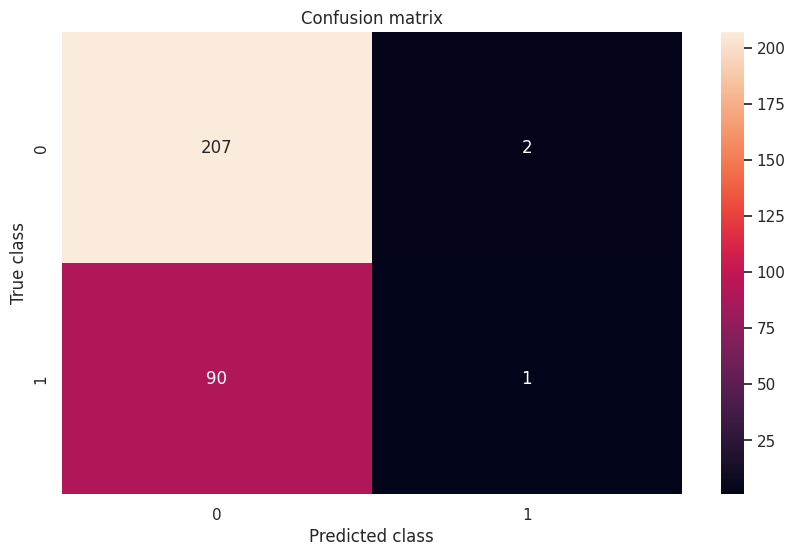

              precision    recall  f1-score   support

           0       0.70      0.99      0.82       209
           1       0.33      0.01      0.02        91

    accuracy                           0.69       300
   macro avg       0.52      0.50      0.42       300
weighted avg       0.59      0.69      0.58       300



In [85]:
mostrar_resultados(y_test, pred_y)

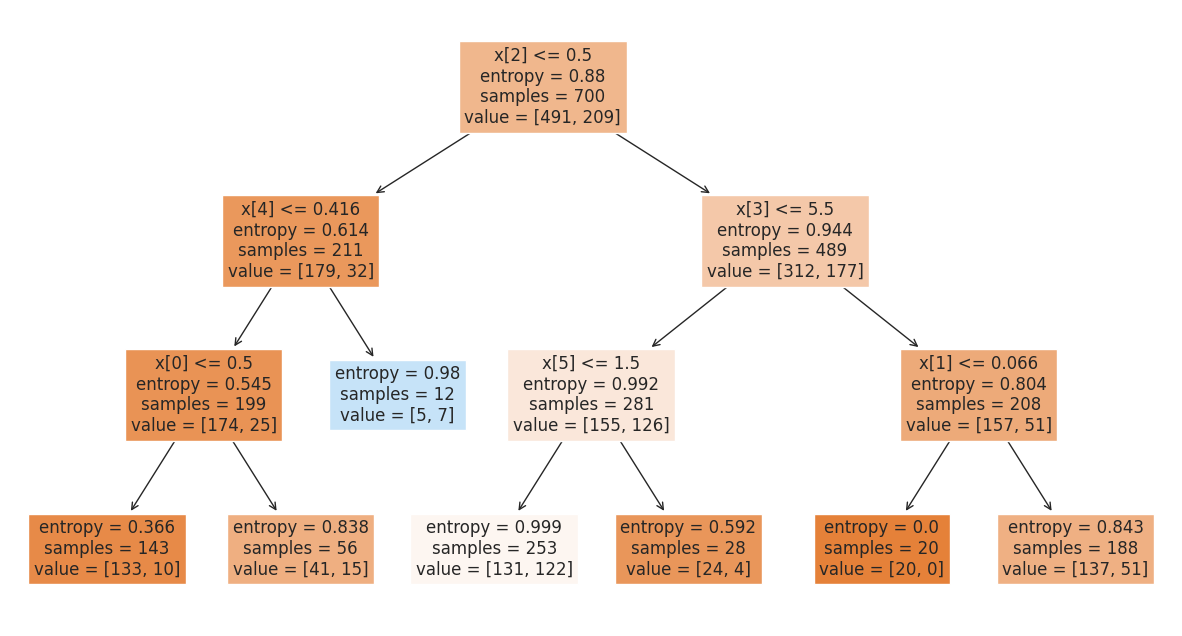

In [86]:
# Creamos la figura donde plotear el árbol con matplotlib
fig, ax = plt.subplots(figsize = (15, 8))

# Llamamos a la función "plot_tree" que importamos de sklearn.tree más arriba.
# Le pasamos como argumento el modelo que creamos y el nombre de los features.
# "fontsize" y "filled" son solo ajustes de la visualización
# y le decimos que plotee el arbol en la figura que creamos
plot_tree(arbol, fontsize = 12, filled = True, ax = ax)
plt.show()

## Bosques aleatorios

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
bosque = RandomForestClassifier(n_estimators=100, )
bosque.fit(X_train, y_train)
pred_y = bosque.predict(X_test)
score_in_test_bosque = bosque.score(X_test, y_test)
print(f'Score en el set de testeo: {score_in_test_bosque}')

Score en el set de testeo: 0.7266666666666667


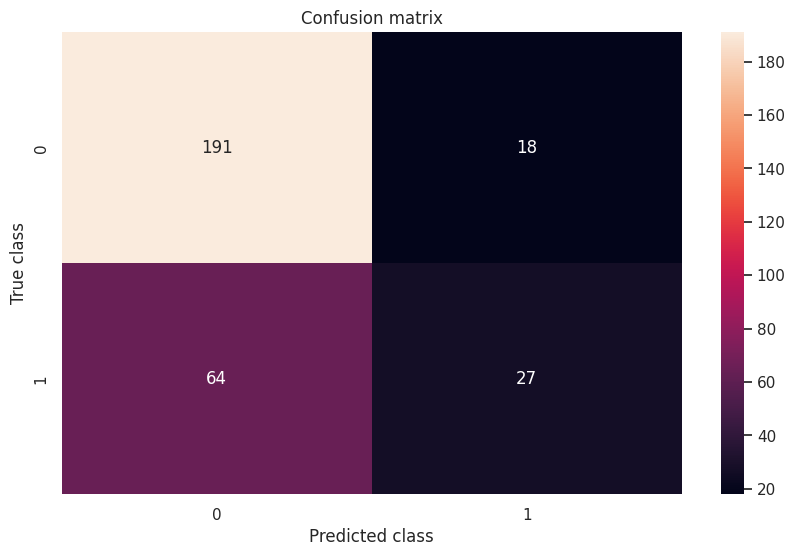

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       209
           1       0.60      0.30      0.40        91

    accuracy                           0.73       300
   macro avg       0.67      0.61      0.61       300
weighted avg       0.70      0.73      0.69       300



In [89]:
mostrar_resultados(y_test, pred_y)

Veamos la importancia que se le ha dado a cada variable:

In [90]:
features = ['estado_de_cuenta', 'duración', 'historial_crediticio', 'propósito',
       'monto_del_crédito', 'estado_de_ahorros', 'ingresos_laborales',
       'compromiso_de_cuotas', 'estado_civil', 'otras_partes_involucradas',
       'años_de_residencia', 'patrimonio', 'edad', 'otros_planes_de_pago',
       'vivienda', 'créditos_existentes', 'empleo', 'teléfono_propio']
# Este atributo tiene una medida de la importancia de cada feature
feature_importance = bosque.feature_importances_

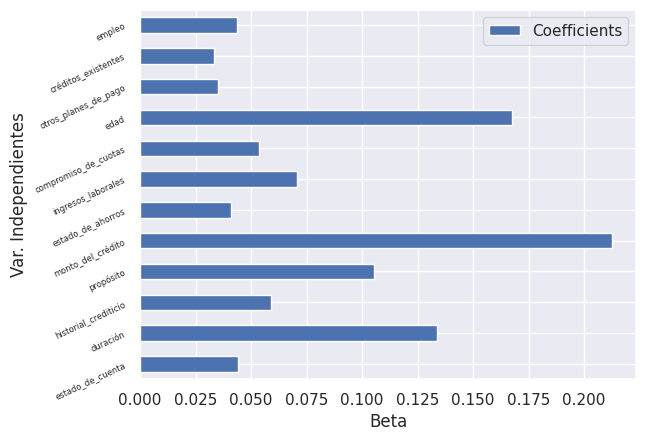

In [91]:
coef = pd.DataFrame({"Coefficients":np.transpose(feature_importance),"Feature":X_train.columns})

ax = coef.plot.barh()
ax.set_ylabel("Var. Independientes")
ax.set_xlabel("Beta")
ax.set_yticklabels(coef.Feature, rotation=25, fontsize=6)
plt.show()

# Comparacion de modelos de clasificación

In [107]:
import pandas as pd

data = [
    ['Reg_Logística', 0.71, 0.43, 0.90, 0.16, 0.80, 0.24, 209, 91],
    ['KNN', 0.73, 0.50 , 0.23, 0.90, 0.32, 0.81, 91, 209],
    ['Naive_Bayes', 0.73, 0.52, 0.90, 0.24, 0.81, 0.33, 209, 91],
     ['Arbol_de_decisión',  0.70,  0.33, 0.99, 0.01, 0.82, 0.02, 209, 91],
     ['Bosque_aleatorio', 0.75, 0.60, 0.91, 0.30, 0.82 , 0.40, 209, 91]
    ]

columns = ['Modelo', 'Precisión_clase_0', 'Precisión_clase_1', 'Recall_clase_0',
           'Recall_clase_1', 'F1-score_clase_0', 'F1-score_clase_1', 'Support_clase_0', 'Support_clase_1']

dfModelos = pd.DataFrame(data, columns=columns)

In [108]:
dfModelos

,Modelo,Precisión_clase_0,Precisión_clase_1,Recall_clase_0,Recall_clase_1,F1-score_clase_0,F1-score_clase_1,Support_clase_0,Support_clase_1
0,Reg_Logística,0.71,0.43,0.90,0.16,0.80,0.24,209,91
1,KNN,0.73,0.50,0.23,0.90,0.32,0.81,91,209
2,Naive_Bayes,0.73,0.52,0.90,0.24,0.81,0.33,209,91
3,Arbol_de_decisión,0.70,0.33,0.99,0.01,0.82,0.02,209,91
4,Bosque_aleatorio,0.75,0.60,0.91,0.30,0.82,0.40,209,91


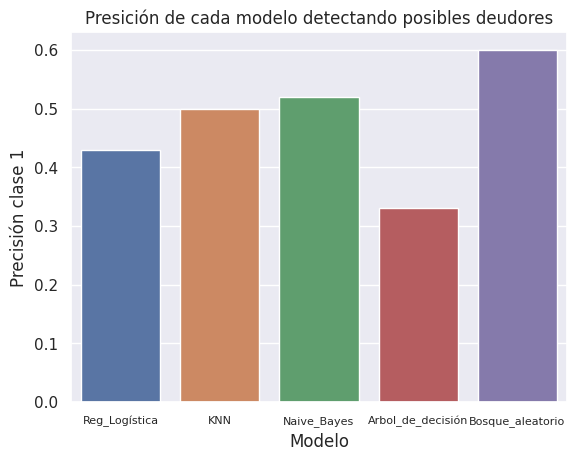

In [106]:
sns.barplot(dfModelos, x = "Modelo", y='Precisión_clase_1')
plt.xticks(fontsize=8)
plt.title("Presición de cada modelo detectando posibles deudores")
plt.show()

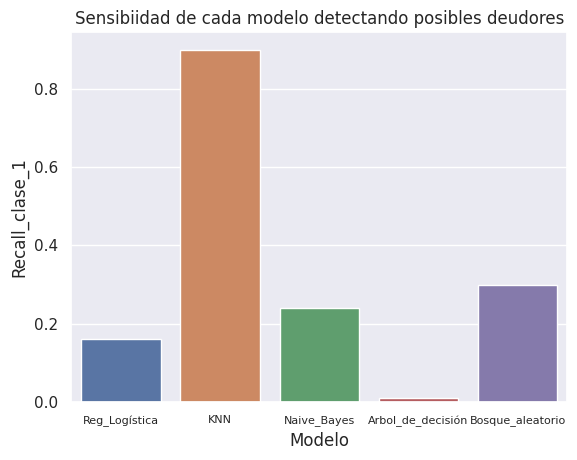

In [109]:
sns.barplot(dfModelos, x = "Modelo", y='Recall_clase_1')
plt.xticks(fontsize=8)
plt.title("Sensibiidad de cada modelo detectando posibles deudores")
plt.show()

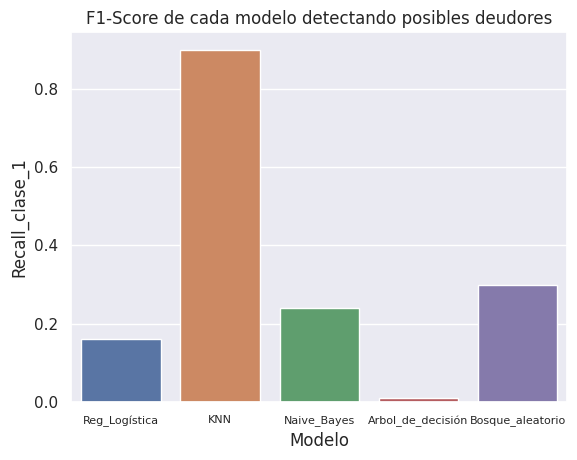

In [111]:
sns.barplot(dfModelos, x = "Modelo", y='Recall_clase_1')
plt.xticks(fontsize=8)
plt.title("F1-Score de cada modelo detectando posibles deudores")
plt.show()